# Pasar de gif a imagen

In [2]:
from PIL import Image
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Nombre del archivo GIF de entrada
gif_path = "gif.gif"

# Carpeta de salida
output_folder = "framez"
os.makedirs(output_folder, exist_ok=True)

# Abrir el GIF
gif = Image.open(gif_path)

# Extraer y guardar cada fotograma
for i in range(gif.n_frames):
    gif.seek(i)
    # Guardar los fotogramas con dos dígitos
    frame_path = os.path.join(output_folder, f"{i:02d}.png")  # {i:02d} garantiza el formato de dos dígitos
    gif.save(frame_path, format="PNG")

print(f"Se han guardado {gif.n_frames} fotogramas en la carpeta '{output_folder}'.")


Se han guardado 20 fotogramas en la carpeta 'framez'.


# Definir funciones para mostrar imagenes

In [3]:
def mostrar_imagen(imagen, titulo):
    # Convertir la imagen de BGR (OpenCV) a RGB (Matplotlib)
    imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(8, 8))
    plt.imshow(imagen_rgb)
    plt.title(titulo)
    plt.axis('off')
    plt.show()
    
def comparar_imagenes(imagen1, titulo1, imagen2, titulo2):

    imagen1_rgb = cv2.cvtColor(imagen1, cv2.COLOR_BGR2RGB)
    imagen2_rgb = cv2.cvtColor(imagen2, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1) 
    plt.imshow(imagen1_rgb)
    plt.title(titulo1)
    plt.axis('off')
        
    plt.subplot(1, 2, 2) 
    plt.imshow(imagen2_rgb)
    plt.title(titulo2)
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

def comparar_tres_imagenes(imagen1, titulo1, imagen2, titulo2, imagen3, titulo3):

    # Convertir las imágenes de BGR a RGB para Matplotlib
    imagen1_rgb = cv2.cvtColor(imagen1, cv2.COLOR_BGR2RGB)
    imagen2_rgb = cv2.cvtColor(imagen2, cv2.COLOR_BGR2RGB)
    imagen3_rgb = cv2.cvtColor(imagen3, cv2.COLOR_BGR2RGB)
    
    # Crear la figura
    plt.figure(figsize=(18, 6))  # Ajustar tamaño para que entren las tres imágenes
    
    # Mostrar la primera imagen
    plt.subplot(1, 3, 1)  # 1 fila, 3 columnas, posición 1
    plt.imshow(imagen1_rgb)
    plt.title(titulo1)
    plt.axis('off')
    
    # Mostrar la segunda imagen
    plt.subplot(1, 3, 2)  # 1 fila, 3 columnas, posición 2
    plt.imshow(imagen2_rgb)
    plt.title(titulo2)
    plt.axis('off')
    
    # Mostrar la tercera imagen
    plt.subplot(1, 3, 3)  # 1 fila, 3 columnas, posición 3
    plt.imshow(imagen3_rgb)
    plt.title(titulo3)
    plt.axis('off')
    
    # Mostrar el resultado
    plt.tight_layout()
    plt.show()


# Cargar imagenes en matriz

In [4]:
import cv2
import numpy as np
import os

# Carpeta donde se encuentran los frames
frames_folder = "framez"

# Lista para almacenar las matrices de los frames
frames = []

# Iterar sobre todos los archivos de la carpeta
for filename in os.listdir(frames_folder):
    # Verificar que el archivo sea una imagen PNG
    if filename.endswith(".png"):
        # Construir la ruta completa del archivo
        frame_path = os.path.join(frames_folder, filename)
        
        # Cargar el frame con OpenCV
        frame = cv2.imread(frame_path)
        
        if frame is not None:
            frames.append(frame)
        else:
            print(f"No se pudo cargar el frame {filename}")


# Eliminar Marcas

Se crea un recuadro en el lugar que se encuentra la fecha y se sustituye ese valor por el color medio del resto de la imagen. Luego hay que suavizar para quitar bordes

In [5]:
def create_upper_mask(image, rect_width=55, rect_height=25):
    height, width, _ = image.shape
    mask = np.zeros((height, width), dtype=np.uint8)    
    mask[0:rect_height, width-rect_width:width] = 255
    
    return mask


def create_lower_mask(image, rect_width=85, rect_height=35):
    height, width, _ = image.shape
    mask = np.zeros((height, width), dtype=np.uint8)
    mask[height-rect_height:height, width-rect_width:width] = 255
    return mask 


def replace_with_avg_color(image, mask):
    
    masked_image = cv2.bitwise_and(image, image, mask=255-mask) 
    avg_color = cv2.mean(masked_image)[:3]  
    
    avg_color = tuple(map(int, avg_color))  
    
    modified_image = image.copy()
    
    modified_image[mask == 255] = avg_color
    
    return modified_image



## Pasar por todas las fotos de la matriz 
for i in range(len(frames)):
    frame = frames[i]
    
    # Eliminar fecha
    mask = create_upper_mask(frame)
    image = replace_with_avg_color(frame, mask)
    
    #Eliminar señal del norte
    mask = create_lower_mask(image)
    image = replace_with_avg_color(image, mask)
    
    # Eliminar escala
    mask = create_lower_mask(image , rect_width = 30 , rect_height= 25)
    image = replace_with_avg_color(image, mask)
    
    # Sustituir la imagen procesada en la matriz de imagenes 
    frames[i] = image


    


# Procesamiento de imagenes
Detectar las nubes y sustituir la informacion por la foto del año pasado 

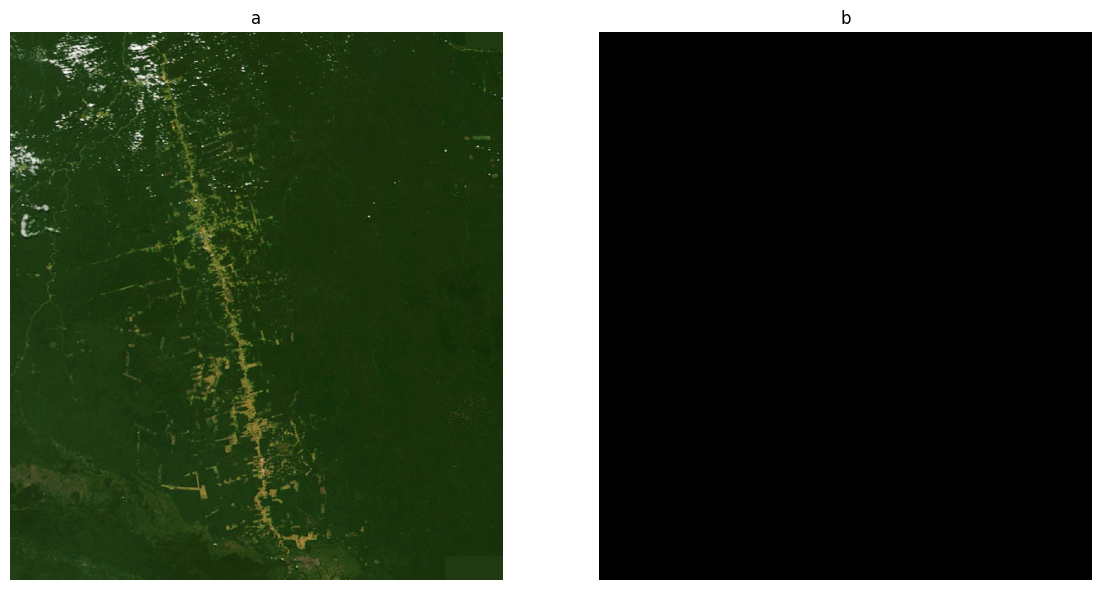

'\n## para eliminar las nubes de las fotos se va a intentar tomar como referencia la anterior, si no hay no se modifica. \nfor i in range(1, len(frames)): \n    \n    frame = frames[i]\n    ant_frame = frames[i-1]\n    \n    mask = detect_white_zones(frame)\n    image = replace_with_another_image (frame, mask, ant_frame)\n    frames[i] = image\n    \n    '

In [ ]:

def detect_white_zones(frame):
    """
    Detecta zonas de color blanco en la imagen utilizando el espacio HSV.
    
    :param frame: Imagen en BGR.
    :return: Máscara binaria con las zonas blancas detectadas.
    """
    # Convertir la imagen a HSV
    hsv_image = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    # Definir el rango de color blanco en HSV
    # Los valores para el color blanco en HSV son un valor alto de V (luminancia),
    # y valores bajos para H (matiz) y S (saturación)
    #lower_white = np.array([0, 0, 70])   # Baja saturación y alta luminancia
    #upper_white = np.array([255, 110, 255])  # Límite superior de blanco
    lower_white = np.array([0, 100, 100])   # Baja saturación y alta luminancia
    upper_white = np.array([10, 255, 255])  # Límite superior de blanco
    
    
    # Aplicar el rango de color blanco en HSV
    mask = cv2.inRange(hsv_image, lower_white, upper_white)
    
    # Realizar operaciones morfológicas para limpiar la máscara (opcional)
    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)  # Eliminar ruido pequeño
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)  # Rellenar huecos
    
    return mask


def replace_with_another_image(original_img, mask, replacement_img):
    """
    Sustituye las zonas seleccionadas en la imagen original por las zonas correspondientes
    en una imagen de reemplazo usando una máscara.
    
    :param original_img: Imagen original en BGR.
    :param mask: Máscara binaria que selecciona las zonas a reemplazar.
    :param replacement_img: Imagen que reemplazará las zonas seleccionadas.
    :return: Imagen modificada.
    """
    # Asegurarse de que la máscara y la imagen de reemplazo tienen el mismo tamaño
    if original_img.shape[:2] != mask.shape[:2]:
        raise ValueError("La máscara y la imagen original deben tener el mismo tamaño")
    
    if original_img.shape[:2] != replacement_img.shape[:2]:
        raise ValueError("La imagen de reemplazo debe tener el mismo tamaño que la original")

    # Crear una imagen de salida igual a la original
    output_img = original_img.copy()

    # Aplicar la máscara a la imagen de reemplazo (extraer solo las áreas seleccionadas)
    replacement_region = cv2.bitwise_and(replacement_img, replacement_img, mask=mask)

    # Aplicar la máscara invertida a la imagen original (conservar el resto de la imagen original)
    original_region = cv2.bitwise_and(original_img, original_img, mask=cv2.bitwise_not(mask))

    # Combinar las dos imágenes: la parte original y la parte reemplazada
    output_img = cv2.add(original_region, replacement_region)

    return output_img


i = 4 
frame = frames[i]
cv2.imshow("Imagen", frame)
"""
## para eliminar las nubes de las fotos se va a intentar tomar como referencia la anterior, si no hay no se modifica. 
for i in range(1, len(frames)): 
    
    frame = frames[i]
    ant_frame = frames[i-1]
    
    mask = detect_white_zones(frame)
    image = replace_with_another_image (frame, mask, ant_frame)
    frames[i] = image
    
    """



# Preprocesamiento de las imagenes


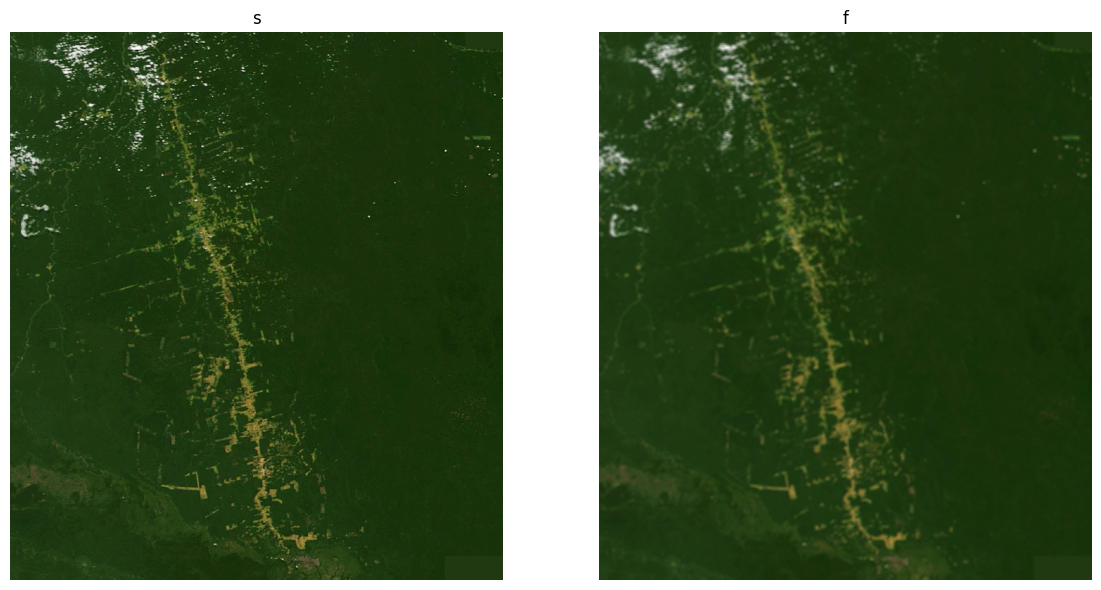

: 

In [ ]:
from scipy import stats 

# Función para aplicar el filtro pasabaja
def aplicar_filtro_pasabaja(imagen, kernel):
    """
    Aplica un filtro pasabaja a la imagen usando un kernel proporcionado.

    :param imagen: Imagen de entrada (en escala de grises).
    :param kernel: Kernel para el filtro.
    :return: Imagen filtrada.
    """
    imagen_filtrada = cv2.filter2D(imagen, -1, kernel)
    return imagen_filtrada



def filtro_bilateral(imagen, tamaño_kernel=15, sigma_color=0.2, sigma_espacial=30):
    """
    Aplica un filtro bilateral a la imagen en escala de grises para suavizarla mientras preserva los bordes.
    
    :param imagen: Imagen en escala de grises de entrada.
    :param tamaño_kernel: Tamaño del kernel, por defecto 15.
    :param sigma_color: Parámetro de suavizado para la diferencia de color, por defecto 0.2.
    :param sigma_espacial: Parámetro de suavizado para la distancia espacial, por defecto 30.
    
    :return: Imagen suavizada con filtro bilateral.
    """
    # Verificar que la imagen esté en escala de grises
    if len(imagen.shape) == 3:
        imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    
    # Aplicar el filtro bilateral
    imagen_suavizada = cv2.bilateralFilter(imagen, d=tamaño_kernel, 
                                           sigmaColor=sigma_color * 255, 
                                           sigmaSpace=sigma_espacial)
    return imagen_suavizada


def apply_mmm_filter(image, filter_type='mean', kernel_size=3):
    """
    Aplica un filtro de moda o media a una imagen.
    :param image: imagen.
    :param filter_type: Tipo de filtro ('mean' o 'median').
    :param kernel_size: Tamaño del kernel (debe ser impar y mayor a 1).
    :return: Imagen filtrada.
    """
    
    if filter_type == 'mean':
        return cv2.blur(image, (kernel_size, kernel_size))
    elif filter_type == 'median':
        return cv2.medianBlur(image, kernel_size)
    else:
        raise ValueError("Filtro inválido. Usa 'mean' o 'median'.")




# Definición de kernels pasabaja
kernels_pasabaja = {
    "suavizado_simple": np.ones((3, 3), dtype=np.float32) / 9,  # Kernel promedio simple 3x3
    "suavizado_mas_potente": np.ones((7, 7), dtype=np.float32) / 81,  # Kernel promedio 5x5 (más potente)
    "gaussiano_debil": cv2.getGaussianKernel(3, 1).dot(cv2.getGaussianKernel(3, 1).T),  # Gaussiano 3x3, sigma=1
    "gaussiano_fuerte": cv2.getGaussianKernel(5, 3).dot(cv2.getGaussianKernel(5, 3).T),  # Gaussiano 5x5, sigma=3
}

frame = frames[4]
suav = apply_mmm_filter(frame, filter_type="mean", kernel_size= 5)
comparar_imagenes(frame, "s", suav,"f")